In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data_dir = 'dataset\\photo\\train'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200,200))



In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200,200))

In [ ]:
#normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
model = Sequential()


In [ ]:
model.add(layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(200, 
                                                              200,
                                                              3)))
model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(160, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(200, 
                                                              200,
                                                              3))])

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(2):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
import numpy as np
from keras.preprocessing import image
img = image.load_img('dataset\\photo\\test\\mauvaise\\6.jpg', target_size=(200,200))
x = image.img_to_array(img)
print(x)
a = model.add(layers.experimental.preprocessing.Rescaling(1./255))
print(a)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

In [ ]:
print(model.summary())

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(model)

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
)

In [6]:
import numpy as np
from tensorflow.keras.models import load_model
import numpy as np
import os
from keras.preprocessing import image
model = load_model('models/CNN_model.h5')
import PIL.Image

In [19]:
def predict(photo):
    img = keras.preprocessing.image.load_img(photo, target_size=(200,200))
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    images = np.vstack([x])
    classes = model.predict(images)
    if(classes[0][0]>0.5):
        return('Not Professional')
    else:
        return('Professional')

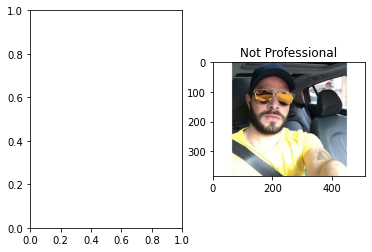

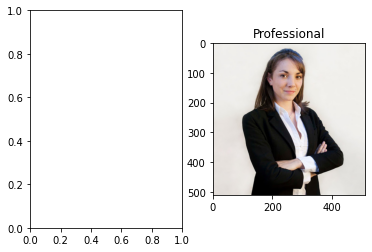

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as img
plt.subplots(1,2)

image = img.imread('dataset\\photo\\bad.jpg')
plt.imshow(image)
plt.title(predict('dataset\\photo\\bad.jpg'))
plt.show()
plt.subplots(1,2)
        
image2 = img.imread('dataset\\photo\\good.jpg')
plt.imshow(image2)
plt.title(predict('dataset\\photo\\good.jpg'))

plt.show()




In [ ]:
list_test = []
for i in range (0,50):
    list_test.append(0)
for j in range (0,45):
    list_test.append(1)
print(list_test)


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import os
from keras.preprocessing import image
model = load_model('confer/photo_analysis/models/CNN_model.h5')
list_test_0 = os.listdir('dataset\\photo\\test\\bonne')
list_test_1 = os.listdir('dataset\\photo\\test\\mauvaise')
list_test_pred = []
for i in range(0,50):
    img = image.load_img(f'dataset\\photo\\test\\bonne\\{list_test_0[i]}', target_size=(200,200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    prediction = model.predict(images)
    if (prediction[0][0]<0.5):
        list_test_pred.append(0)
    else :
        list_test_pred.append(1)


for i in range(0,45):
    img = image.load_img(f'dataset\\photo\\test\\mauvaise\\{list_test_1[i]}', target_size=(200,200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    prediction = model.predict(images)
    if (prediction[0][0]<0.5):
        list_test_pred.append(0)
    else :
        list_test_pred.append(1)



In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()